# Исследование объявлений о продаже квартир

 Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройтие файла с данными и изучение общей информации. 

**Импортируем библиотеки:**

In [1]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Просмотр первых 10-ти строк DataFrame
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Получение общей информации о DataFrame

In [3]:
#Получение общей информации о DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы имем следующие данные о столбцах:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


1. *last_price* значения в столбце нужно изменить на *int*
2. *ceiling_height* есть отсуствующие значения
3. *floors_total* есть отсуствующие значения, нужно изменить данные в ячейке на *int* так, как этаж это целое число
4. *living_area* есть отсуствующие значения
5. *is_apartment* нужно изменить на  сзначения столбца на *bool* (заменив отсуствующие значения False) или сотавить тот формат что есть задав новый критерий "нет данных"
6. *kitchen_area* есть отсуствующие значения
7. *balcony * есть отсуствующие значениянужно изменить данные в ячейке на *int* так, как балконов не бывает 1.5 =)
8. *locality_name* есть отсуствующие значения, плюс необходимо заменить данные на дату
9. *cityCenters_neares* есть отсуствующие значения, для удобвства можно изменить  название столбца
9. *parks_around3000* есть отсуствующие значения, нужно изменить данные в ячейке на *int*
9. *parks_nearest* есть отсуствующие значения
9. *ponds_around3000* есть отсуствующие значения, нужно изменить данные в ячейке на *int*
9. *airports_nearest* есть отсуствующие значени
9. *days_exposition* есть отсуствующие значени, нежно изменить данные на *int*

In [4]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


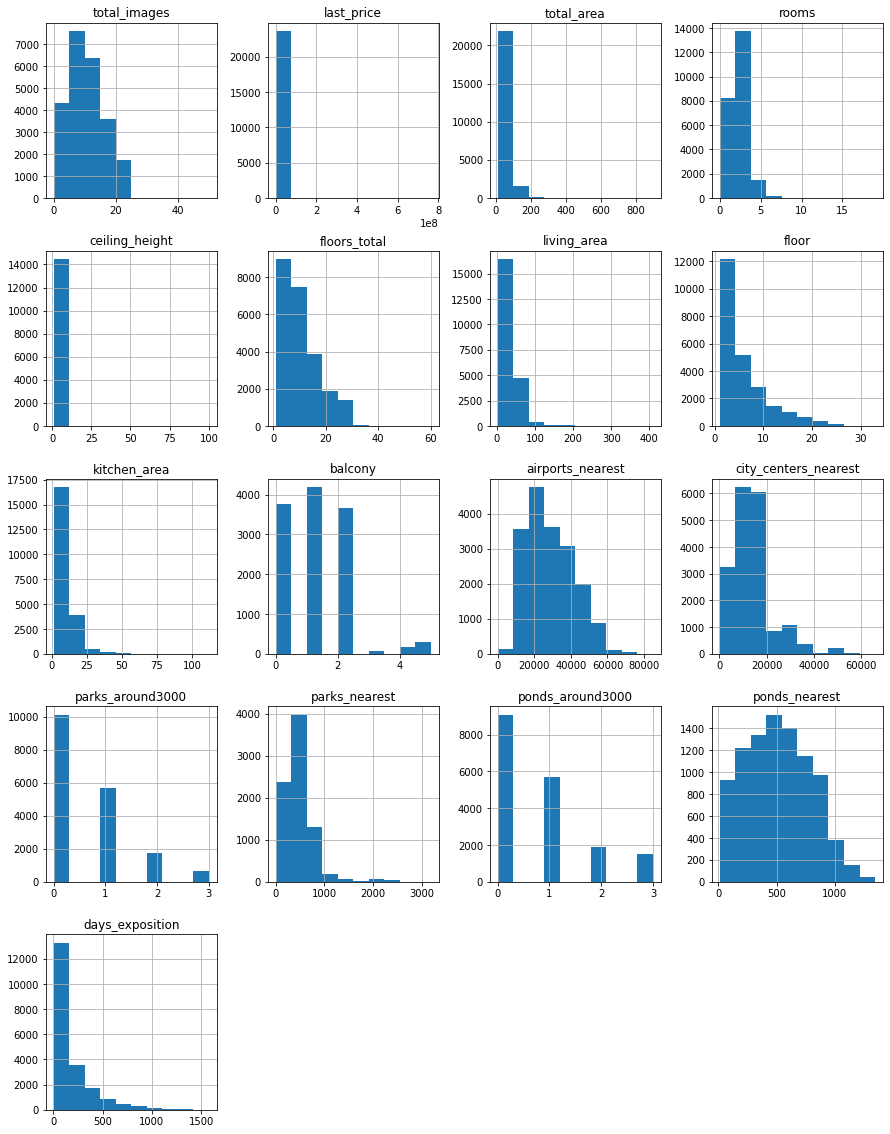

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Определение пропусков  и обработка пропусков

In [7]:
#сводная таблица для изменений, удаления анамальных значений
good_data = data

In [8]:
good_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_сenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


>В таблице имеются столбцы где отсуствуетбольше 50% данных, стоблец сданными обозначения аппартаментов

#### Исследование и заполнение пропусков в данных

>В столбце с выстой потолка отсутсвует 9195 значений, это 39%. Отсуствующие значения можно заменить медианой так, как в среднем высота потолка выше 3м встречается редко.

In [10]:
ceiling_height_median = data['ceiling_height'].median()
good_data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

>В столбце с номером этажа отсутсвует всего 86 значений. Мы не можем определить этаж на котором расположана квартира и задавать медиану или среднее значение не очень логично, поэтому в этих данных можно поставить маркер для дальнейшей обработки результатов и сохранения важных значений в этих строках.
 * 77777 - будет маркером

In [11]:
good_data['floors_total'] = data['floors_total'].fillna(77777)

>Столбец с жилой площадью квартиры так же не остался в строне, пропуски можно заполнить медианой, сгруппировав жилую площадь по колличеству комнат или по общей площади. Так как распределение по комнатам выглядит проще и выборка по комнатам меньше, и есть логическая зависимость чем больше комнат в квартире тем больше жилая площадь, но как и везде есть исключения. Выборка пообщей площади больше и присуствуют единичные значение где медиана будет равна этому же значению.

In [12]:
good_data['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [13]:
group_area = good_data.groupby('rooms').agg({'living_area':['median']})
group_area

,living_area
,median
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000


In [14]:
#цикл для замены значений в столбцах 
for t in  good_data['rooms'].unique():
    good_data.loc[(good_data['rooms'] == t) & (good_data['living_area'].isna()), 'living_area'] = \
    good_data.loc[(good_data['rooms'] == t), 'living_area'].median()
good_data['living_area'].describe()

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

>Послеобработки пустых занчений, группировке по комнатам и выводу функции *describe()* можно заметить что присутсвуют аномально высокие значения среди квартир с коллчиесвом комнат выше 10.

>В столбца *is_apartment* отсутсвует 88% данных и не сможет нам помочь в расчетах и исследованих, логического объяснения отсуствию значений нет, значит можно заполнить пропуски любым значение (или вообще удалить этот столбец!)

In [15]:
good_data['is_apartment'] = good_data['is_apartment'].fillna(False)

>С площаью кухни поступим так же как с жилой площадью, заполним пустые значения медианой площади кухни сгруппированной по колличеству комнат

In [16]:
#промерим как работает медиана елси распределить площадь по комнатам
group_kitchen = good_data.groupby('rooms').agg({'kitchen_area':['median']})
group_kitchen

,kitchen_area
,median
rooms,
0,NaN
1,9.04
2,8.80
3,9.50
4,11.10
5,15.10
6,19.50
7,20.00


>Имеются квартиры гдезначения комнат равно нулю, скоре всего это студии поэтому, как таковой площади кухни там нет. В таких помещениях заменим все на 0

In [17]:
good_data['kitchen_area'] = good_data['kitchen_area'].fillna(0)

In [18]:
for t in  good_data['rooms'].unique():
    good_data.loc[(good_data['rooms'] == t) & (good_data['kitchen_area'].isnull()), 'kitchen_area'] = \
    good_data.loc[(good_data['rooms'] == t), 'kitchen_area'].median()   
good_data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

In [19]:
good_data[['living_area', 'rooms', 'kitchen_area', 'studio']].query('rooms == 0')

,living_area,rooms,kitchen_area,studio
144,15.50,0,0.0,True
349,17.00,0,0.0,False
440,24.75,0,0.0,True
508,24.30,0,0.0,False
608,18.00,0,0.0,True
...,...,...,...,...
23210,18.00,0,0.0,True
23442,18.00,0,0.0,False
23554,18.00,0,0.0,True
23592,18.00,0,0.0,False


>C балконами такая же ситуация как и с обозначением аппартаментов. Причина отсуствия значений не ясна, либо значение просто не уканазно, либо это не балкон а лоджия. Поэтому примем пропуски за незаполненные значения по причине отсуствия болкона

In [20]:
good_data['balcony'] = good_data['balcony'].fillna(0)

>Отсуствующих строк в столбце места  всего 49 поэтому пока можно заменить отсутсвующие значения маркером что бы не потерять другие важные данные из строк
  * отсутствует

In [21]:
locality = good_data['locality_name'].value_counts(dropna=False).reset_index()
locality

,index,locality_name
0,Санкт-Петербург,15721
1,посёлок Мурино,522
2,посёлок Шушары,440
3,Всеволожск,398
4,Пушкин,369
...,...,...
360,деревня Пельгора,1
361,посёлок при железнодорожной станции Вещево,1
362,поселок Гладкое,1
363,деревня Рапполово,1


In [22]:
locality.tail(20)

,index,locality_name
345,поселок Каложицы,1
346,поселок Сумино,1
347,поселок Жилпосёлок,1
348,коттеджный поселок Счастье,1
349,посёлок Дзержинского,1
350,посёлок Пансионат Зелёный Бор,1
351,поселок городского типа Кондратьево,1
352,поселок Красносельское,1
353,поселок станции Корнево,1
354,поселок Тёсово-4,1


In [23]:
#Удалим все неуникальные записи
good_data.shape, good_data.drop('locality_name', axis=1).drop_duplicates().shape

((23699, 22), (23699, 21))

In [24]:
 good_data['locality_name'] = good_data['locality_name'].fillna('отсутствует')

>Во в каждом из солбцов отсуствует больше 20% значений в некоторыхи все 66% , поэтому сложно будет заменить значения на медианные, так же в таблице имется много поселков, деревень, сел где нет парков, прудов или центра. Поэтому для сохранение других данных  вэтих строках заполним пустые значения маркером.
 
 * airports_nearest      
 * city_сenters_nearest   
 * parks_around3000      
 * parks_nearest         
 * ponds_around3000      
 * ponds_nearest     


In [25]:
data['airports_nearest'].value_counts(dropna=False).reset_index()

,index,airports_nearest
0,NaN,5542
1,37434.0,61
2,21928.0,32
3,39946.0,30
4,44870.0,30
...,...,...
8271,27905.0,1
8272,35951.0,1
8273,42055.0,1
8274,22665.0,1


In [26]:
data['city_сenters_nearest'].value_counts(dropna=False).reset_index()

,index,city_сenters_nearest
0,NaN,5519
1,8460.0,61
2,20802.0,32
3,10720.0,30
4,20444.0,27
...,...,...
7638,5278.0,1
7639,11575.0,1
7640,3205.0,1
7641,12747.0,1


In [27]:
data['parks_around3000'].value_counts(dropna=False).reset_index()

,index,parks_around3000
0,0.0,10106
1,1.0,5681
2,NaN,5518
3,2.0,1747
4,3.0,647


In [28]:
data['parks_nearest'].value_counts(dropna=False).reset_index()

,index,parks_nearest
0,NaN,15620
1,441.0,67
2,173.0,41
3,392.0,41
4,456.0,40
...,...,...
991,1211.0,1
992,4.0,1
993,760.0,1
994,2747.0,1


In [29]:
data['ponds_around3000'].value_counts(dropna=False).reset_index()

,index,ponds_around3000
0,0.0,9071
1,1.0,5717
2,NaN,5518
3,2.0,1892
4,3.0,1501


In [30]:
data['ponds_nearest'].value_counts(dropna=False).reset_index()

,index,ponds_nearest
0,NaN,14589
1,427.0,70
2,454.0,41
3,153.0,40
4,433.0,39
...,...,...
1092,150.0,1
1093,105.0,1
1094,59.0,1
1095,1187.0,1


In [31]:
good_data['airports_nearest'] =good_data['airports_nearest'].fillna(77777)
good_data['city_сenters_nearest'] = good_data['city_сenters_nearest'].fillna(77777)
good_data['parks_around3000'] = good_data['parks_around3000'].fillna(77777)
good_data['parks_nearest'] = good_data['parks_nearest'].fillna(77777)
good_data['ponds_around3000'] = good_data['ponds_around3000'].fillna(77777)
good_data['ponds_nearest'] = good_data['ponds_nearest'].fillna(77777)

> В столбце с колличеством дней размещения объявления отсустует 13% информации но мы не можем определить сколькодней весело объявление так как даты снятия публикации у нас нет, поэтому заменим все пустые значения нулем для сохранения другой важной ифнормации

In [32]:
good_data['days_exposition'] = good_data['days_exposition'].fillna(0)

In [33]:
good_data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_сenters_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Изменение типов данных

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [35]:
#просмотр первых 10 строк даты публикаций
good_data['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

In [36]:
#просмотр последних 10 строк даты публикаций
good_data['first_day_exposition'].tail(10)

23689    2018-02-28T00:00:00
23690    2018-07-19T00:00:00
23691    2016-10-13T00:00:00
23692    2017-07-07T00:00:00
23693    2016-08-05T00:00:00
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, dtype: object

>После проверки первых и последних 10 строк видно что в столбце присутсвуют только даты за год месяц и день, время везде имеет нулевое значение, следовательно нужно изменить данные столбца на формат datatime и оставить только первые три значения.

In [37]:
#изменение столбца с датой
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%d')

In [38]:
#изменение типа данных цены на момент снятия с публикации
good_data['last_price'] = good_data['last_price'].astype('int')

#изменение типа данных общим колличеством этажей
good_data['floors_total'] = good_data['floors_total'].astype('int')

#изменение типа данных балконов
good_data['balcony'] = good_data['balcony'].astype('int')

#изменение типа данных в колличестве парков
good_data['parks_around3000'] = good_data['parks_around3000'].astype('int')

#изменение типа данных в колличестве озер
good_data['ponds_around3000'] = good_data['ponds_around3000'].astype('int')

#изменение типа данных в колличестве дней экспозиции
good_data['days_exposition'] = good_data['days_exposition'].astype('int')

good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Обработка неявных дубликатов

In [39]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

In [40]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

>В столбце с расположением дома есть схожие названия, но объеденить или сгруппировать их не возможно так как есть два вида напсиание поселок и посёлок, поселок городского типа. По возмождности нужэно привести данные к единому виду.

In [41]:
#переведем все к нижнему регистру
good_data['locality_name'] = good_data['locality_name'].str.lower()
good_data['locality_name'] = good_data['locality_name'].str.replace('ё', 'е') 
good_data['locality_name'] = good_data['locality_name'].str.replace('поселок', '')
good_data['locality_name'] = good_data['locality_name'].str.replace('деревня', '')
good_data['locality_name'] = good_data['locality_name'].str.replace('село', '')
good_data['locality_name'] = good_data['locality_name'].str.replace('поселок городского типа', 'поселок')
good_data['locality_name'] = good_data['locality_name'].str.replace('городской поселок', 'поселок')
good_data['locality_name'] = good_data['locality_name'].str.replace('городского типа', 'поселок')
good_data['locality_name'] = good_data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'поселок')
good_data['locality_name'] = good_data['locality_name'].str.replace('садовое товарищество', 'поселок')
good_data['locality_name'] = good_data['locality_name'].str.strip()
good_data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'городской  янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'коммунар', 'колпино', 'поселок красный бор', 'гатчина',
       'федоровское', 'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'поселок лебяжье', 'поселок сиверский',
       'молодцово', 'поселок кузьмоловский', 'поселок новая ропша',
       'павловск', 'пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'куттузи', 'аннино',
       'поселок ефимовский', 'плодовое', 'заклинье', 'торковичи',
       'первомайское', 'красное', 'понтонный', 'сясьстрой', 'старая',
       'лесколово', 'новый свет', 'сланцы', 'путилово', 'ивангород',
       'шлиссельбург', 'никольское', 'зеленогорск', 'сосновый бор',
       'оржицы', 'кальтино', 'романовка', 'бугры', 'поселок рощино',
       'кириши', 'луга', 'волосово', 'отрадное', 'павлово', 'оредеж',
       'копорье', 'молодежное', 'тихвин', 'побе

In [42]:
good_data['locality_name'].value_counts().reset_index().head(11)

,index,locality_name
0,санкт-петербург,15721
1,мурино,590
2,кудрово,472
3,шушары,440
4,всеволожск,398
5,пушкин,369
6,колпино,338
7,парголово,327
8,гатчина,307
9,выборг,237


In [43]:
good_data.duplicated().sum()

0

#### Обработка и удаление аномалий (редких значений)

In [44]:
data['ceiling_height'].value_counts()

2.65     9871
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [45]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

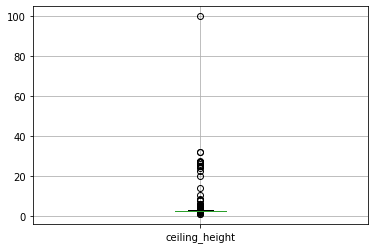

In [46]:
data.boxplot(column =['ceiling_height']); data['ceiling_height'].describe()

Максимальное значение сильно отличается от 75 квартиля и на графике видно выброс 100 м, минимальное значение для высоты потолков слишком низкое (квартира для гномов?)?

In [47]:
data.loc[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,городской мга,77777.0,77777.0,77777,77777.0,77777,77777.0,248
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,санкт-петербург,18732.0,20444.0,0,77777.0,3,80.0,71
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,санкт-петербург,33053.0,14217.0,2,293.0,2,289.0,13


In [48]:
data.loc[data['ceiling_height'] > 5].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000,280.3,2015-06-11,6,5.2,8,159.500,7,False,...,21.1,0,санкт-петербург,26316.0,6655.0,3,187.0,1,616.0,578
12628,14,3900000,50.0,2018-03-29,1,5.3,5,17.600,5,False,...,0.0,0,санкт-петербург,19644.0,3918.0,1,505.0,1,92.0,8
1026,20,155000000,310.0,2018-10-12,5,5.3,3,190.000,3,False,...,63.0,2,санкт-петербург,24899.0,4785.0,0,77777.0,1,603.0,0
7578,17,38000000,143.0,2017-11-02,3,5.5,5,83.000,5,False,...,29.0,1,санкт-петербург,26333.0,6448.0,3,479.0,0,77777.0,0
1388,20,59800000,399.0,2015-01-21,5,5.6,6,91.785,6,False,...,0.0,0,санкт-петербург,26204.0,6934.0,2,149.0,2,577.0,719
21227,0,8200000,71.0,2017-07-21,0,5.8,5,68.000,5,False,...,0.0,0,санкт-петербург,20170.0,1261.0,2,295.0,3,366.0,30
20264,17,119000000,187.6,2017-07-10,4,6.0,7,147.000,7,False,...,15.6,0,санкт-петербург,26902.0,5605.0,3,484.0,1,305.0,259
17442,0,5350000,54.0,2015-06-16,2,8.0,5,29.000,2,False,...,0.0,1,красное,24638.0,28062.0,0,77777.0,0,77777.0,469
15743,14,5600000,67.0,2016-11-11,3,8.0,16,41.000,1,False,...,8.0,0,санкт-петербург,32691.0,11035.0,1,723.0,0,77777.0,474
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.300,2,False,...,7.3,0,нурма,77777.0,77777.0,77777,77777.0,77777,77777.0,125


>В столбце присуствуют аномальные значения по высоте потолков. Такие значение как 20 - 32 большая часть квартир из этого списка  находится в Санкт-Питербурге и скорее всего эти значения не верно добавлены, значит их можно исправить. Так же есть аномально значение потолков равное 100 метрам, думаю тут такая же ошибка.

In [49]:
good_data.groupby('locality_name').agg({'ceiling_height':['median']})

,ceiling_height
,median
locality_name,
агалатово,2.650
александровская,2.710
алексеевка,2.650
аннино,2.625
аро,2.650
...,...
щеглово,2.650
юкки,2.700


count    23699.000000
mean         2.697914
std          0.237252
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

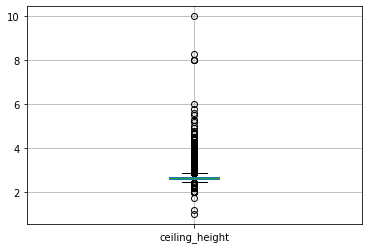

In [50]:
ceiling_height_median = data['ceiling_height'].median()
good_data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
good_data['ceiling_height'] = data['ceiling_height'].replace({32.00:3.2, 20.00:2.0, 22.6:2.2, 25:2.5, 
                                                              27.00:2.7, 24.00:2.4, 26.00:2.6, 10.3:2.65, 
                                                              14.0:2.65, 27.5:2.7, 100.00:10.0})
good_data.boxplot(column =['ceiling_height']); good_data['ceiling_height'].describe()

#### **Вывод**: 
Была проведена первичная обработка данных датасета. Было обнаружено большее колличество отсутсвующих данных нужных для исследования, все данные по возможности были заменены на медианные значения или маркеры для сохранения другой важной информации для анализа в строках. Так же присуствуют аномально высокие значения их я так же оставляю для созранения других важных данных в строках.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [51]:
#подсчет цена одного квадратного метра
good_data['price_square_meter'] = good_data['last_price'] / good_data['living_area'] 
good_data['price_square_meter'] = good_data['price_square_meter'].astype('int')

#### День недели, месяц, год публикации объявления

In [52]:
#добавление дней недели, месяца и года публикаций
good_data['weekday_exposition'] = good_data['first_day_exposition'].dt.weekday
good_data['month_exposition'] = good_data['first_day_exposition'].dt.month
good_data['year_exposition'] = good_data['first_day_exposition'].dt.year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
</div>

#### Разделение на типы этажа 

In [53]:
#добавление типа этажа квартиры
def type_floor(value):
    floors_total = value['floors_total']
    floors = value['floor']
    if floors == 1:
        return 'первый'
    if floors_total == floors:
        return 'последний'
    return 'другое'

good_data['type_floors'] = good_data.apply(type_floor, axis = 1)

>Проверим как распределились данные в типе этажа:

In [54]:
good_data.loc[good_data['type_floors'] == 'первый']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,77777.0,0,77777.0,81,180107,1,12,2018,первый
14,1,4400000,36.0,2016-06-23,1,2.65,6,17.0,1,False,...,0,77777.0,1,96.0,203,258823,3,6,2016,первый
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,3,420.0,0,77777.0,397,120503,3,11,2017,первый
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,3,411.0,3,124.0,265,139784,5,10,2015,первый
28,8,4170000,44.0,2017-12-13,1,2.90,6,20.8,1,False,...,0,77777.0,1,118.0,74,200480,2,12,2017,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.0,2016-05-20,1,2.65,6,18.2,1,False,...,2,624.0,1,519.0,131,233516,4,5,2016,первый
23673,9,3100000,23.0,2018-03-19,1,2.80,9,12.6,1,False,...,1,262.0,1,442.0,41,246031,0,3,2018,первый
23680,14,5000000,59.0,2019-04-04,3,2.50,5,52.0,1,False,...,0,77777.0,0,77777.0,0,96153,3,4,2019,первый
23696,18,2500000,56.7,2018-02-11,2,2.65,3,29.7,1,False,...,77777,77777.0,77777,77777.0,0,84175,6,2,2018,первый


In [55]:
good_data.loc[good_data['type_floors'] == 'последний']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors
12,10,3890000,54.0,2016-06-30,2,2.65,5,30.0,5,False,...,77777,77777.0,77777,77777.0,90,129666,3,6,2016,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1,294.0,3,298.0,366,131481,5,7,2017,последний
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,False,...,2,517.0,1,190.0,615,166666,5,10,2016,последний
36,13,3790000,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,1,459.0,0,77777.0,139,140370,2,1,2017,последний
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.0,4,False,...,0,77777.0,1,492.0,763,333214,1,1,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,3100000,30.0,2018-03-28,1,2.50,5,17.0,5,False,...,0,77777.0,0,77777.0,10,182352,2,3,2018,последний
23644,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,1,560.0,1,171.0,166,154489,3,4,2018,последний
23648,14,10100000,78.0,2017-05-12,3,3.27,5,48.6,5,False,...,1,621.0,2,117.0,621,207818,4,5,2017,последний
23660,1,2950000,53.6,2018-02-01,2,2.75,3,32.0,3,False,...,0,77777.0,0,77777.0,35,92187,3,2,2018,последний


>По результатам таблиц видно что наша функция работает корректно.

#### Разделение по городам
 - санкт-петербург    15721
 - мурино               590
 - кудрово              472
 - шушары               440
 - всеволожск           398
 - пушкин               369
 - колпино              338
 - парголово            327
 - гатчина              307
 - выборг               237
 
В предобработке данных я определела в таблице 10 городов с самой большой вариацией. Созданим новые столбец с разделением на 10 самых часто встречаюзихся городовБ все остальное обозначим как _Другое_

In [56]:
good_data['locality_name'].value_counts().reset_index().head(10)

,index,locality_name
0,санкт-петербург,15721
1,мурино,590
2,кудрово,472
3,шушары,440
4,всеволожск,398
5,пушкин,369
6,колпино,338
7,парголово,327
8,гатчина,307
9,выборг,237


In [57]:
def type_name(row):
    if row in 'санкт-петербург':
        return 'санкт-петербург'
    if row in 'мурино':
        return 'мурино '
    if row in 'кудрово':
        return 'кудрово '
    if row in 'шушары':
        return 'шушары'
    if row in 'всеволожск':
        return 'всеволожск'
    if row in 'пушкин':
        return 'пушкин'
    if row in 'колпино':
        return 'колпино'
    if row in 'парголово':
        return 'парголово'
    if row in 'гатчина':
        return 'гатчина'
    if row in 'выборг':
        return 'выборг'
    return 'другое'

good_data['type_local_name'] = good_data['locality_name'].apply(type_name)
good_data[['locality_name','type_local_name']]

,locality_name,type_local_name
0,санкт-петербург,санкт-петербург
1,шушары,шушары
2,санкт-петербург,санкт-петербург
3,санкт-петербург,санкт-петербург
4,санкт-петербург,санкт-петербург
...,...,...
23694,санкт-петербург,санкт-петербург
23695,тосно,другое
23696,рождествено,другое
23697,санкт-петербург,санкт-петербург


#### Расстояние до центра города в километрах

In [58]:
good_data['city_сenters_nearest_km'] = good_data['city_сenters_nearest'] // 1000
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors,type_local_name,city_сenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,0,254901,3,3,2019,другое,санкт-петербург,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,77777.0,81,180107,1,12,2018,первый,шушары,18.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558,151486,3,8,2015,другое,санкт-петербург,13.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424,1442222,4,7,2015,другое,санкт-петербург,6.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,312500,1,6,2018,другое,санкт-петербург,8.0


#### **Вывод:**
Расчитаны и добавлены в таблицу как новые столбецы:
- расчет одного квадратного метра  ['price_square_meter'], значение сразу преведенов целочисленное
- день недели, месяц, год размещения объявления. Для каждого значения добавлен новый столбец ['weekday_exposition'],['month_exposition'], ['year_exposition']
- добавлен столбец тип этажа ['type_floors'] 
- добавлен столбец тип города ['type_local_name']
- добавлен новый столбец с растрояним до центра города в километрах ['city_сenters_nearest_km']


### Изучение и описание параметров 

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления

In [59]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int64         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int64         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

#### Изучение общей площади

,total_area
count,23699.000000
mean,60.348651
std,35.654083
min,12.000000
25%,40.000000
50%,52.000000
75%,69.900000
max,900.000000


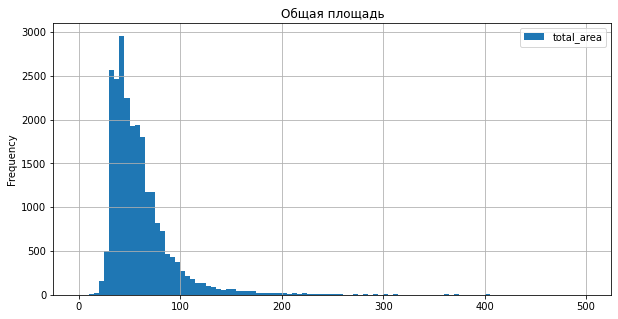

In [60]:
# изучим общую площадь 
good_data.plot(title = 'Общая площадь', y = 'total_area', kind = 'hist', 
               bins = 100, grid=True, figsize = (10,5), range = (0,500))
good_data['total_area'].describe().to_frame()

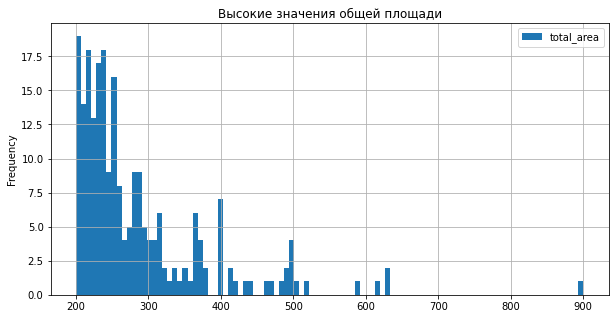

In [61]:
(
    good_data
    .query('total_area > 200')
    .plot(title = 'Высокие значения общей площади', y = 'total_area', kind = 'hist', 
    bins = 100, grid=True, figsize = (10,5), range = (200,900))
);

> В распределении значений видно что минимальная площадь квартиры представленная на рынке составляет 12 м2 а максимальное 900м2. Среднее значение данных находиться на 60 м2, что не так сильно отличается от медианного 52 м2, похоже на номральное распределение (Гаусса). График так же это поддвержает, имеются выбросы и аномальные значения площади.

#### Изучение жилой площади

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

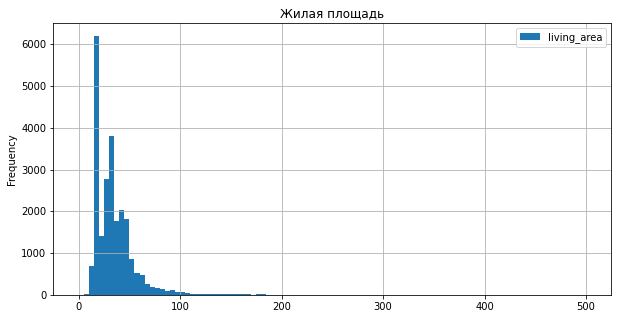

In [62]:
#жилая площадь
good_data.plot(title = 'Жилая площадь', y = 'living_area', kind = 'hist', 
               bins = 100, grid=True, figsize = (10,5), range = (0,500))
good_data['living_area'].describe()

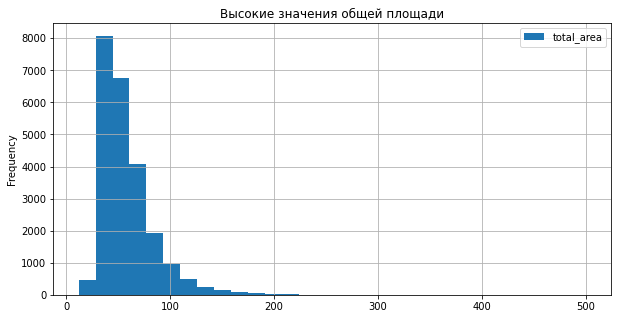

In [63]:
(
    good_data
    .query('living_area < 100')
    .plot(title = 'Высокие значения общей площади', y = 'total_area', kind = 'hist', 
     bins = 30, grid=True, figsize = (10,5))
);

> В распределении по жилой площади видно что минимальное значение составляет 2 м2 (видимо это квартира Бэндера), а максимальное значение 409, что не очень соспоставлеятся со значениями общей жилой площади (900 метро общая площадь 409 жилая, видимо все остальное это гардиробная кайли дженер). Стандартное отклонение составляет 21.7м2, что не сильно отличается от медианного значения 30 м2. Данное распределние так же похоже на нормальное.

#### Изучение площади кухни

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

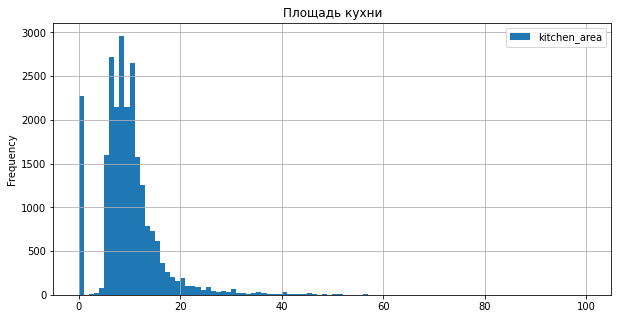

In [64]:
#площадь кухни
good_data.plot(title = 'Площадь кухни', y = 'kitchen_area', kind = 'hist', 
               bins = 100, grid=True, figsize = (10,5), range = (0,100))
good_data['kitchen_area'].describe()

>В распредлении видно что минимальная площадь кухни составляет 0 м2, так как выше установлено что данные помещения скорее всего являются квартирой-студией или помещением предназначеным под склад так, как таких значений в дата фрейме не мало около 8000 то на графике хорошо виден данный пик(выброс). Максимальное значение площади кухни равняется 112 м2, что вполне реально, но аномально. Все данные имеют номрально распредение Гаусса, срреднее значение и медианное значение совпадают.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Этот пропуск, мы заменили на 0 (в стадии обработки пропусков). ЕЯ бы не рекомендовал бы его учитывать
</div>

#### Изчучение цены объекта

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

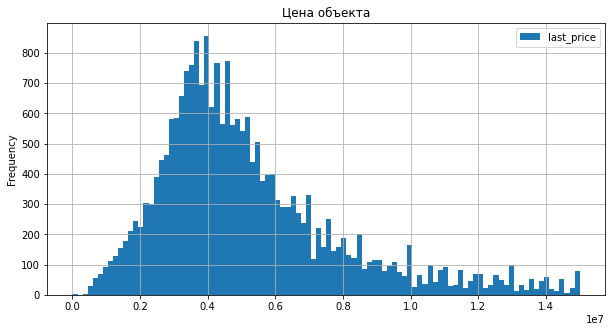

In [65]:
#цена объекта
good_data.plot(title = 'Цена объекта', y = 'last_price', kind = 'hist', 
               bins = 100, grid=True, figsize = (10,5), range = (0,15000000))
(good_data['last_price'] / 1000000).describe()

> Распеделение цена на недвижимость похожа на нормальное распределение. Среднее значение составляет 6.5 млнБ медианное 4.6 млн. Минимальная строимость составляет 12 тыс, надо изучуить эту строку скорее всего это выброс

#### Изучение колличества комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

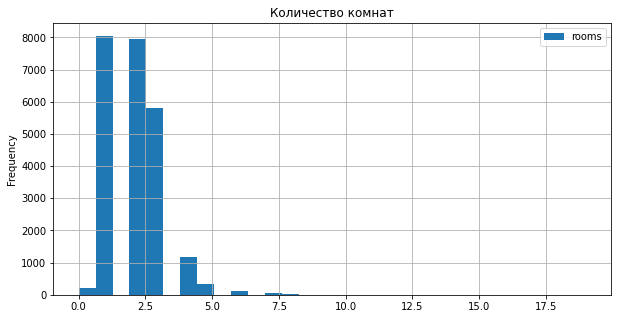

In [66]:
#количество комнат
good_data.plot(title = 'Количество комнат', y = 'rooms', kind = 'hist', 
               bins = 30, grid=True, figsize = (10,5))
good_data['rooms'].describe()

> Колличество комнат представленных на ранке варьируется от 0 до 19, среднее значение комнат составляет 2, медианное тоже равно 2-м комнатам.

#### Изучение высоты потолков

count    23699.000000
mean         2.697914
std          0.237252
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

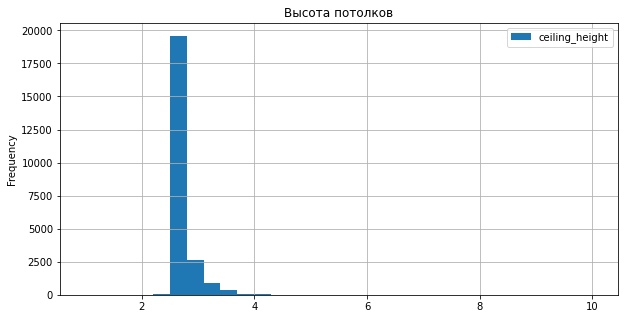

In [67]:
#высота потолков
good_data.plot(title = 'Высота потолков', y = 'ceiling_height', kind = 'hist', 
               bins = 30, grid=True, figsize = (10,5))
good_data['ceiling_height'].describe()

> Медаинноезначение высоты потолков 2.65 м, среднее значение составлет 2.69 м. Минимальнон значение высоты потолков составяет 1 м, что является не очень адекватным значеним.

#### Изучение этажей квартиры

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

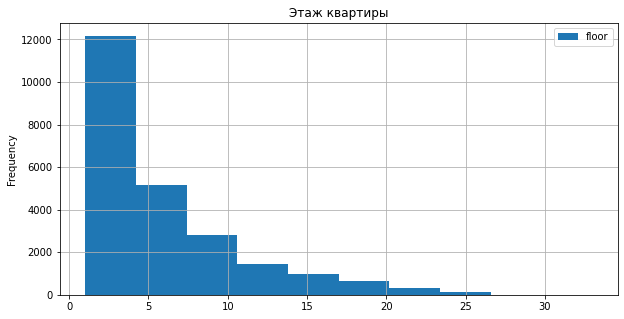

In [68]:
#этаж квартиры
good_data.plot(title = 'Этаж квартиры', y = 'floor', kind = 'hist', 
               bins = 10, grid=True, figsize = (10,5))
good_data['floor'].describe()

> Распредение на графике адекватное , больше всего квартир расположено с 1 по 4, дальше колличество этажей плавно умееньшаются. Медианное значение этажей равняется 4, срденее 5, масимальное коллчиесво этажей 33

#### Изучение типа этажа квартиры

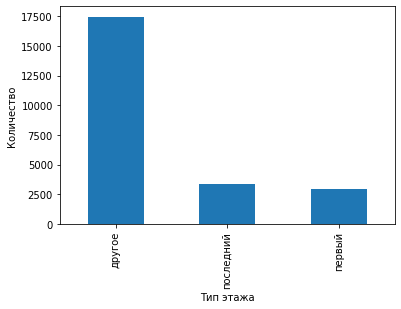

In [69]:
#тип этажа квартиры («первый», «последний», «другой»)
good_data['type_floors'].value_counts().plot.bar();
plt.xlabel("Тип этажа")
plt.ylabel("Количество")
plt.show()

> По данному распределению видно что большая часть помещений находиться на "других" этажах

#### Изучение общего количества этажей в доме

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

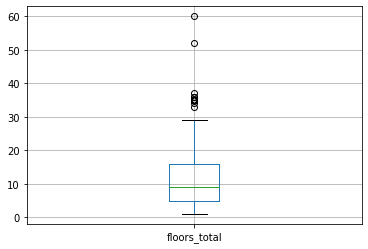

In [70]:
good_floors_total = good_data.query('floors_total != 77777')
                     
good_floors_total.boxplot(column =['floors_total']); good_floors_total['floors_total'].describe()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, что не забыли про заглушку
</div>

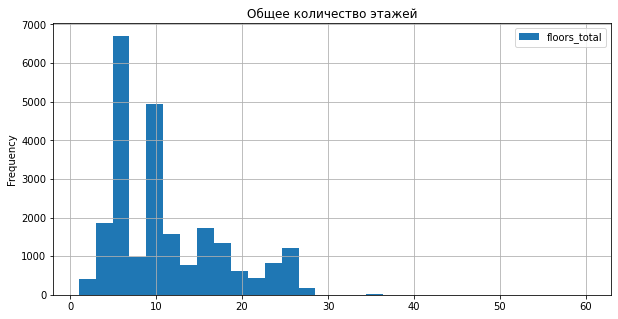

In [71]:
#общее количество этажей в доме
(
    good_data
    .query('floors_total != 77777')
    .plot(title = 'Общее количество этажей', y = 'floors_total', kind = 'hist', 
    bins = 30, grid=True, figsize = (10,5))
);

In [72]:
good_data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors,type_local_name,city_сenters_nearest_km
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,3,614.0,166,138686,3,6,2018,другое,другое,49.0


> Медианное коллчиесво общего значения этажа равно 9, минимальнон значение этажей в здании равняется 1,максимальное значение составляет 60 этажей это явно выброс.

#### Изучение расстояния до центра города в метрах 

In [73]:
#Срез таблицы без маркера 
good_city_сenters_nearest = good_data.query('city_сenters_nearest != 77777') 
good_city_сenters_nearest['city_сenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

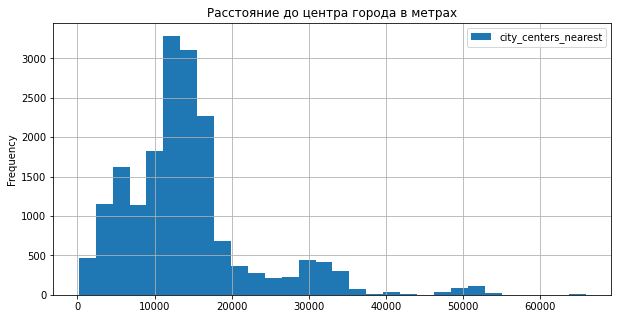

In [74]:
#Расстояние до центра города в метрах 
(
    good_city_сenters_nearest
    .plot(title = 'Расстояние до центра города в метрах', y = 'city_сenters_nearest', kind = 'hist', 
    bins = 30, grid=True, figsize = (10,5))
);

>Медианное значение расстояния до центра составляет 16293 м, максимальное значение 65968 м (как всегда что-то аномальное), минимальное значение 181 м. Так как у нас большая вариация по локализации то и разброс получается достаточно большой. Но с данными все в порядке можно работать дальше.

#### Изучение расстояния до ближайшего аэропорта

In [75]:
good_airports_nearest = good_data.query('airports_nearest != 77777') 

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

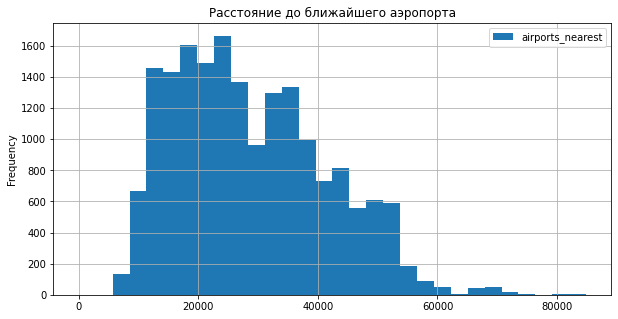

In [76]:
#расстояние до ближайшего аэропорта
(
    good_airports_nearest
    .plot(title = 'Расстояние до ближайшего аэропорта', y = 'airports_nearest', kind = 'hist', 
    bins = 30, grid=True, figsize = (10,5))
); good_airports_nearest['airports_nearest'].describe()

In [77]:
good_airports_nearest.query('airports_nearest == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors,type_local_name,city_сenters_nearest_km
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,0,77777.0,60,353535,6,9,2018,другое,санкт-петербург,22.0


In [78]:
good_airports_nearest.query('airports_nearest > 80000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors,type_local_name,city_сenters_nearest_km
577,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,0,77777.0,0,108108,6,7,2017,первый,другое,65.0
2974,13,3200000,46.3,2018-03-31,2,2.50,3,29.2,2,False,...,0,77777.0,205,109589,5,3,2018,другое,другое,62.0
5218,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,...,0,77777.0,121,98915,0,9,2018,другое,другое,64.0
5340,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,...,0,77777.0,0,120401,1,3,2019,другое,другое,65.0
9640,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,...,0,77777.0,1194,135483,2,12,2014,другое,другое,65.0
18884,15,3600000,57.6,2019-02-08,3,2.55,3,41.3,2,False,...,0,77777.0,13,87167,4,2,2019,другое,другое,62.0
20746,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,...,0,77777.0,1043,121323,1,2,2016,другое,другое,65.0


> Очень иснтересно минимальное значение расстояния до аэропорта равняется нулю и такое значение в таблице одно. медианное значение равняется 26726 м, максимально значение  равняется 84869 м, данные выглядят адекватно.

#### Изучение расстояния до ближайшего парка 

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

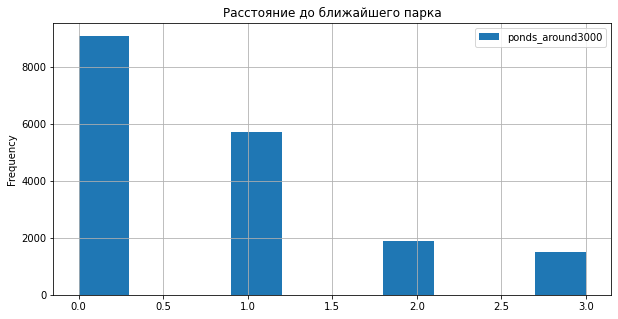

In [79]:
#расстояниt до ближайшего парка 
good_ponds_around3000 = good_data.query('ponds_around3000 != 77777')
(
    good_ponds_around3000
    .query('ponds_around3000 != 77777')
    .plot(title = 'Расстояние до ближайшего парка', y = 'ponds_around3000', kind = 'hist', 
    grid=True, figsize = (10,5))
); good_ponds_around3000['ponds_around3000'].describe()

>Распределение по паркам идет по снижение, больше всего мест где в радиусе 3 км 0 парков и меньше всего значений где в радиусе 3 км  есть 3 парка, так же нужно учесть тот момент что в данных есть поселки в которых может  и не быть парков.

#### Изучение деня и месяца публикации объявления

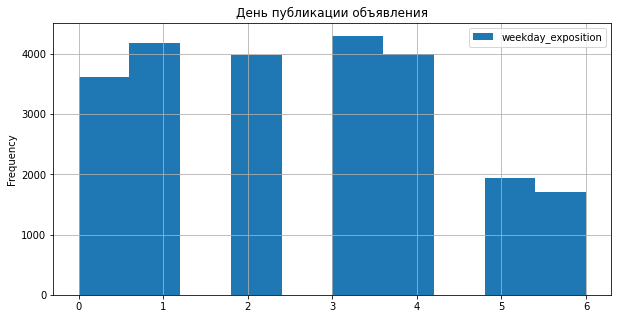

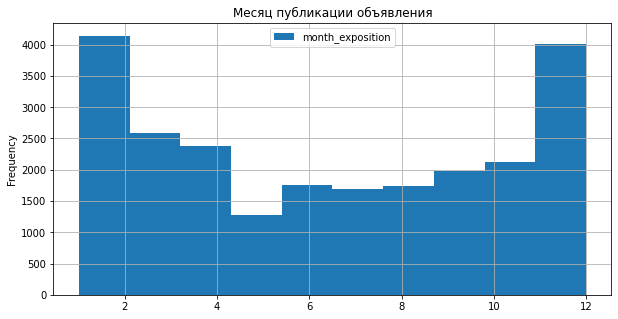

In [80]:
#день и месяц публикации объявления  days_exposition  month_exposition
(
    good_data
    .plot(title = 'День публикации объявления', y = 'weekday_exposition',
    kind = 'hist', grid=True, figsize = (10,5))
);


(
    good_data
    .plot(title = 'Месяц публикации объявления', y = 'month_exposition', 
    kind = 'hist', grid=True, figsize = (10,5))
);


> На графике распределения публикации объявлений по дню можно увидеть что в выходыне дни публикуется объявлений в двараза меньше чем в буднии, на самом деле это странно так как на показы квартир люди ходят в свой выходной день в будни занимаются изучением и выбором.

> На графике распределения времени публикаций по месяцам можно увидеть что больше всего публикаций приходиться на зимний переиод (декабрь, январь, февраль), весной и летом меньше всего публикаций, а к наступлению осени показатели повышаются. Наверное это связано с тем что зимой и осенью редко кто берет отпуска, а летом и осенью особенно в питере все стремяться отдохнуть.

#### **Вывод:**
Было проведено изучение, различных данных датафрейма. Вданных выявлены неадекватные значения:
* Общая площадь квартиры равная 900 м2;
* Жилая площадь равная 409 м2;
* Площадь кухни равная 112 м2;
* Цена обекта 12 тыс;
* Колличество комнат равное 0;
* Высота потолков ниже 2 м и выше 5;
* Общее колличество этажей в дома равное 60 (при этом дом находится в столбце 'type_local_name' *Другое*
* Расстояние до аэропорта равное нулю

**Общие выводы по графикам:**
1. Минимальная площадь квартиры представленная на рынке составляет 12 м2 а максимальное 900м2. Среднее значение данных находиться на 60 м2, что не так сильно отличается от медианного 52 м2, похоже на номральное распределение (Гаусса). 

2. По жилой площади видно что минимальное значение составляет 2 м2, а максимальное значение 409 м2, что не очень соспоставлеятся со значениями общей жилой площади (900 метро общая площадь 409 жилая). Стандартное отклонение составляет 21.7м2, что не сильно отличается от медианного значения 30 м2. Данное распределние так же похоже на нормальное.

3. Минимальная площадь кухни составляет 0 м2, так как выше установлено что данные помещения скорее всего являются квартирой-студией или помещением предназначеным под склад так, как таких значений в датафрейме не мало около 8000. Максимальное значение площади кухни равняется 112 м2, что вполне реально, но аномально. Все данные имеют номрально распредение, среднее значение и медианное значение совпадают.

4. Распеделение цен на недвижимость похожа на нормальное. Среднее значение составляет 6.5 млн, медианное 4.6 млн. Минимальная строимость составляет 12 тыс. и максимальноезначение равно 763 млн.

5. Колличество комнат представленных на ранке варьируется от 0 до 19, среднее значение комнат составляет 2, медианное тоже равно 2-м комнатам.

6. Медаинное значение высоты потолков 2.65 м, среднее значение составлет 2.69 м. Минимальнон значение высоты потолков составяет 1 м.

7. Больше всего квартир расположено с 1 по 4, дальше колличество этажей плавно умееньшаются. Медианное значение этажей равняется 4, срденее 5, масимальное коллчиесво этажей 33

8. По данному распределению видно что большая часть помещений находиться на "других" этажах

9. Медианное коллчиесво общего значения этажа равно 9, минимальнон значение этажей в здании равняется 1, максимальное значение составляет 60.

10. Медианное значение расстояния до центра составляет 16293 м, максимальное значение 65968 м, минимальное значение 181 м. Так как у нас большая вариация по локализации то и разброс получается достаточно большой.

11. Очень иснтересно минимальное значение расстояния до аэропорта равняется нулю и такое значение в таблице одно. Медианное значение равняется 26726 м, максимально значение  равняется 84869 м, данные выглядят адекватно.

12. Распределение по паркам идет по снижение, больше всего мест где в радиусе 3 км 0 парков и меньше всего значений где в радиусе 3 км  есть 3 парка

13. На графике распределения публикации объявлений по дню можно увидеть что в выходыне дни публикуется объявлений в двараза меньше чем в буднии, на самом деле это странно так как на показы квартир люди ходят в свой выходной день в будни занимаются изучением и выбором. На графике распределения времени публикаций по месяцам можно увидеть что больше всего публикаций приходиться на зимний переиод (декабрь, январь, февраль), весной и летом меньше всего публикаций, а к наступлению осени показатели повышаются. Наверное это связано с тем что зимой и осенью редко кто берет отпуска, а летом и осенью особенно в питере все стремяться отдохнуть.



### Исследовательский анализ данных

#### Как быстро продавались квартиры (столбец days_exposition). 

In [81]:
good_data[good_data['days_exposition']!=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [82]:
days_exposition_value = good_data[good_data['days_exposition']!=0]['days_exposition'].value_counts().reset_index()
days_exposition_value.head(10)

,index,days_exposition
0,45,880
1,60,538
2,7,234
3,30,208
4,90,204
5,4,176
6,3,158
7,5,152
8,14,148
9,9,143


In [83]:
days_exposition_value.tail(10)

,index,days_exposition
1131,697,1
1132,681,1
1133,1368,1
1134,1336,1
1135,1240,1
1136,1112,1
1137,1080,1
1138,1064,1
1139,1032,1
1140,1391,1


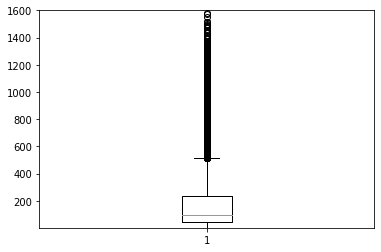

In [84]:

plt.boxplot(good_data[good_data['days_exposition']!=0]['days_exposition']); 
plt.ylim(1,1600); 


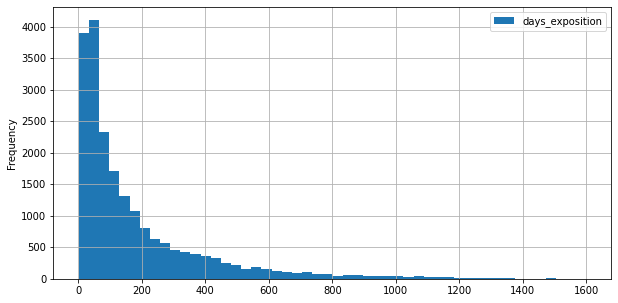

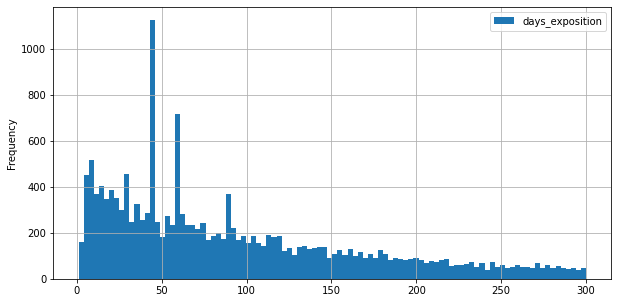

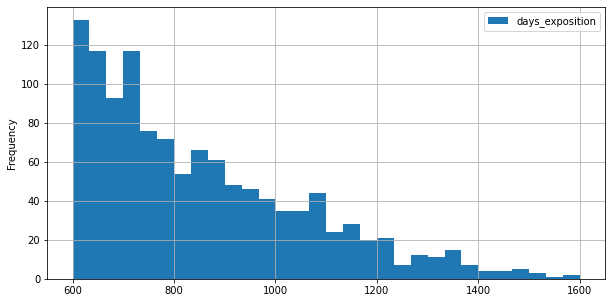

In [85]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600), figsize = (10,5));

good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300), figsize = (10,5));

good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (600,1600), figsize = (10,5));


> На гистрограмме видно нормально распределение. Медианное значение дней экспозиции равняется 95, среднее время экспозиции равняется 180.  Можно заметить что минимальное время размещение объявление равно 1 это аномально быстрая продажа, плюс имеются аномально долгие продажи превышающие 1000 дней что видно при применении метода _value_counts()_, так же можно увидеть что больше всего продаж осществляется на 45, 60, 7, 30 и 90 днях. 

>Если анализировать данные по методу _describe()_  то 25% квартиль равняется 45 дням, а 75% квартиль равняется 232 дням, значит межквартальный размах идет от 45 до 232, и получается аномально быстрые знаяения те чтоменьше 45, а аномально быстрые те что больше 232.

>Если анализировать данные по графику диаграммы размаха то видно что нижняя граница "уса" начинается на значение 1, верхняя граница заканчивается в районе 500 дней, следовательно нормальная скорость продаж распологается в пределах от 1 до 500 дней. Получается что аномально быстрых продаж квартиры нет и есть только аномально долгие (выше 500 дней).

In [86]:
x = good_data.query('days_exposition == 45 or days_exposition == 60')
x

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,type_floors,type_local_name,city_сenters_nearest_km
22,20,5000000,58.0,2017-04-24,2,2.75,25,30.0,15,False,...,77777,77777.0,60,166666,0,4,2017,другое,кудрово,77.0
78,9,4350000,37.0,2018-02-22,1,2.65,19,18.0,6,False,...,0,77777.0,45,241666,3,2,2018,другое,санкт-петербург,14.0
82,3,4500000,80.5,2018-01-15,3,2.65,25,45.0,16,False,...,0,77777.0,60,100000,0,1,2018,другое,шушары,18.0
89,9,2500000,63.0,2018-10-25,3,2.50,5,43.0,4,False,...,77777,77777.0,45,58139,3,10,2018,другое,другое,77.0
105,12,4900000,32.0,2018-01-07,1,2.65,25,15.0,5,False,...,1,464.0,60,326666,6,1,2018,другое,санкт-петербург,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,9,5100000,36.0,2018-10-26,1,2.80,15,18.0,11,False,...,1,405.0,60,283333,4,10,2018,другое,санкт-петербург,11.0
23642,14,5950000,80.3,2018-07-03,3,2.70,12,45.0,5,False,...,2,562.0,60,132222,1,7,2018,другое,колпино,33.0
23670,9,2450000,45.6,2018-02-08,1,2.80,9,17.6,2,False,...,77777,77777.0,45,139204,3,2,2018,другое,другое,77.0
23679,0,2500000,35.0,2017-12-08,1,2.65,9,17.6,4,False,...,77777,77777.0,45,142045,4,12,2017,другое,другое,77.0


<AxesSubplot:xlabel='weekday_exposition'>

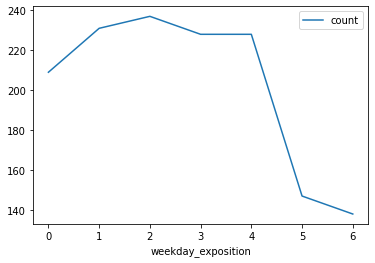

In [87]:
w = x.pivot_table(index = 'weekday_exposition', values = 'days_exposition', aggfunc = ['mean', 'median', 'count'])
w.columns = ['mean', 'median', 'count']
w.plot(y = 'count')

<AxesSubplot:xlabel='month_exposition'>

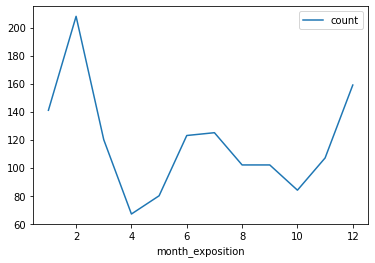

In [88]:
m = x.pivot_table(index = 'month_exposition', values = 'days_exposition', aggfunc = ['mean', 'median', 'count'])
m.columns = ['mean', 'median', 'count']
m.plot(y = 'count')

In [89]:
m 

,mean,median,count
month_exposition,,,
1,50.319149,45,141
2,49.975962,45,208
3,50.250000,45,120
4,52.388060,45,67
5,48.937500,45,80
6,50.121951,45,123
7,51.840000,45,125
8,50.735294,45,102
9,49.852941,45,102


<AxesSubplot:xlabel='year_exposition'>

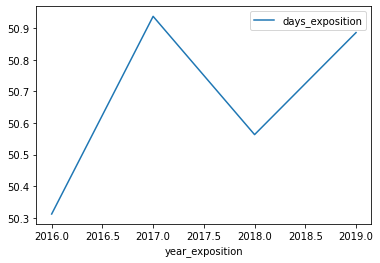

In [90]:
y = x.pivot_table(index = 'year_exposition', values = 'days_exposition')
y.plot()


In [91]:
y

,days_exposition
year_exposition,
2016,50.312500
2017,50.937500
2018,50.563565
2019,50.886076


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [92]:
good_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_square_meter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'type_floors', 'type_local_name', 'city_сenters_nearest_km'],
      dtype='object')

##### Влияние жилой площади квартиры на полную стоимость

In [93]:
pivot_total_area = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_total_area.columns =  ['mean', 'median', 'count']
pivot_total_area

,mean,median,count
total_area,,,
12.0,2400000.0,2400000.0,1
13.0,2350000.0,1850000.0,3
13.2,1686000.0,1686000.0,1
14.0,1190000.0,1190000.0,1
15.0,1725000.0,1725000.0,2
...,...,...,...
590.0,65000000.0,65000000.0,1
618.0,300000000.0,300000000.0,1
631.0,140000000.0,140000000.0,1


0.6536750579657242

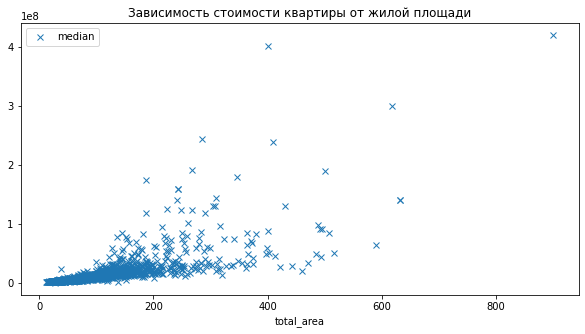

In [94]:
(
    pivot_total_area
    .sort_values(by='median', ascending = False)
    .plot(y = 'median', style = 'x', title = 'Зависимость стоимости квартиры от жилой площади', figsize=(10, 5))
); good_data['total_area'].corr(good_data['last_price'])

0.6592113703715996

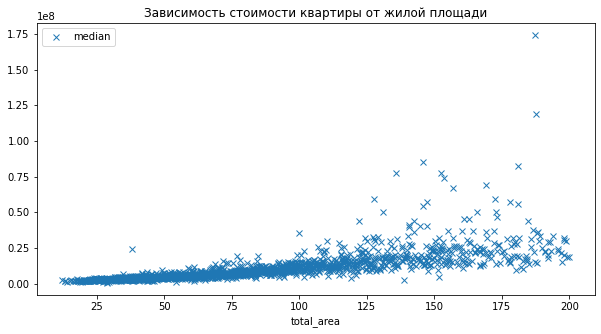

In [95]:
(
    pivot_total_area
    .query('total_area <= 200')
    .sort_values(by='median', ascending = False)
    .plot(y = 'median', style = 'x', title = 'Зависимость стоимости квартиры от жилой площади', figsize=(10, 5))
); good_data[good_data['total_area'] <= 200]['total_area'].corr(good_data['last_price'])

> Кэффициент Пирсона высоко положительный  - 0.65, следовательно с увелчиением общей площажди сильно растет и цена.

##### Влияние площади кухни на полную стоимость

In [96]:
pivot_kitchen_area = good_data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_kitchen_area.columns =  ['mean', 'median', 'count']
pivot_kitchen_area

,mean,median,count
kitchen_area,,,
0.0,6.518244e+06,4000000.0,2278
1.3,4.250000e+06,4250000.0,1
2.0,2.821429e+06,2720000.0,7
2.3,2.940000e+06,2940000.0,1
2.4,2.200000e+06,2200000.0,1
...,...,...,...
93.2,8.240000e+07,82400000.0,1
100.0,6.500000e+07,65000000.0,1
100.7,1.250000e+07,12500000.0,1


0.3864437841938422

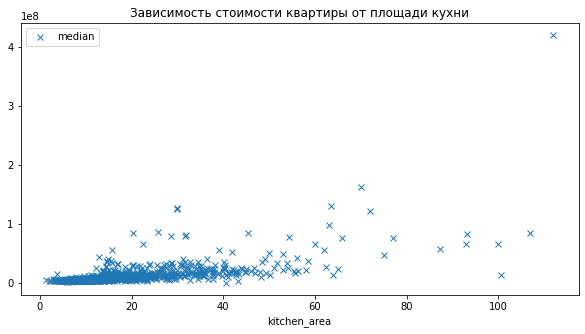

In [97]:
(
    pivot_kitchen_area
    .query('kitchen_area != 0')
    .sort_values(by='median', ascending = False)
    .plot(y = 'median', style = 'x', title = 'Зависимость стоимости квартиры от площади кухни', figsize=(10, 5))
); good_data['kitchen_area'].corr(good_data['last_price'])

> Кэффициент Пирсона средне положительный  - 0.38, следовательно с увелчиением общей стоимости  не сильно растет величина кухни 

##### Влияние количества комнат на полную стоимость

In [98]:
pivot_rooms = good_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_rooms.columns =  ['mean', 'median', 'count']
pivot_rooms

,mean,median,count
rooms,,,
0,3.337724e+06,2700000,197
1,3.835362e+06,3600000,8047
2,5.591605e+06,4770169,7940
3,8.179119e+06,6200000,5814
4,1.342350e+07,9000000,1180
5,2.376208e+07,14000000,326
6,3.170975e+07,19000000,105
7,5.147007e+07,24900000,59
8,5.022417e+07,23095000,12


0.3633428499648948

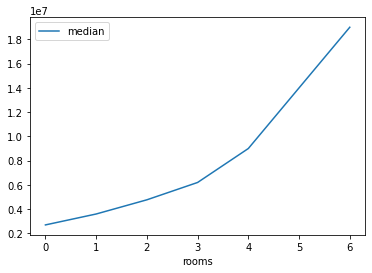

In [99]:
(
    pivot_rooms
    .query('count > 60')
    .sort_values(by='median', ascending = False)
    .plot(y = 'median')
); good_data['rooms'].corr(good_data['last_price'])

> Кэффициент Пирсона средне положительный  - 0.36, следовательно с увелчиением общей стоимости не сильно растет колличество комнат в квартире

##### Влияние типа этажа, на котором расположено помещение на полную стоимость

In [100]:
pivot_type_floors = good_data.pivot_table(index = 'type_floors', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_type_floors.columns =  ['mean', 'median', 'count']
pivot_type_floors

,mean,median,count
type_floors,,,
другое,6.675444e+06,4850000,17446
первый,4.803560e+06,3900000,2917
последний,7.361025e+06,4300000,3336


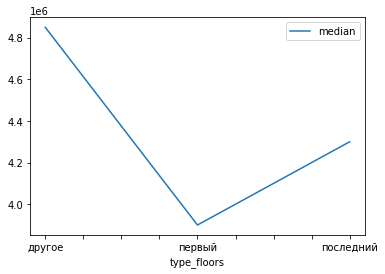

In [101]:
(
    pivot_type_floors
    .plot(y = 'median')
);

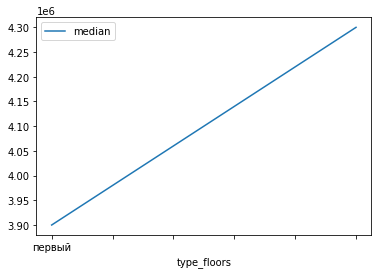

In [102]:
(
    pivot_type_floors
    .query('type_floors != "другое"')
    .plot(y = 'median')
);

> На графике видно что квартиры расположенные на первом этаже стоят дешевле чем на последнем, но при этом медианные значения не сильно отличаются друг от друга

##### Влияние даты размещения (день недели, месяц, год) на полную стоимость

'weekday_exposition', 'month_exposition', 'year_exposition'

###### Влияние дня размещения

In [103]:
pivot_weekday_exposition = good_data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_weekday_exposition.columns =  ['mean', 'median', 'count']
pivot_weekday_exposition

,mean,median,count
weekday_exposition,,,
0,6.511613e+06,4650000,3612
1,6.394233e+06,4730000,4183
2,6.627970e+06,4700000,3974
3,6.708663e+06,4650000,4295
4,6.372131e+06,4585000,4000
5,6.976804e+06,4555000,1936
6,6.246180e+06,4550000,1699


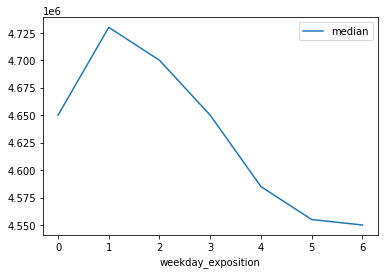

In [104]:
pivot_weekday_exposition.plot(y='median');

>На графике четко видно что помещения с самой высокой ценой выставляют по Вторникам, после вторника цена резко начинает падать и приходик к минимальному значению в восресенье. Хоть разница между максимальной и минимальной ценой не такая и большая, но кому-то эти 200 тыс. очень сильно помогут) Как мы уже видили раньше, больше всего объявлений выкладывают в будни, но почему цена во вторник самая высока? Люди во время рабочей недели понимают что можно и продать подороже.

###### Влияние месяца размещения

In [105]:
pivot_month_exposition = good_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_month_exposition.columns =  ['mean', 'median', 'count']
pivot_month_exposition

,mean,median,count
month_exposition,,,
1,6.668233e+06,4600000,1500
2,6.468500e+06,4650000,2640
3,6.359275e+06,4650000,2587
4,6.737198e+06,4800000,2379
5,6.600435e+06,4515000,1274
6,6.310269e+06,4400000,1760
7,6.649337e+06,4650000,1695
8,6.350233e+06,4570000,1744
9,6.825470e+06,4700000,1981


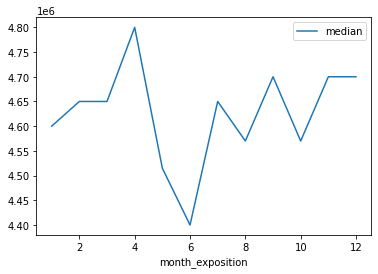

In [106]:
pivot_month_exposition.plot(y='median');

> График зависимости цены от месяца размещения чем то напоминает график распределения времени публикаций по месяцам, одни из высоких цен все так жеможно наблюдать в зимний и осенний периодыБ правда есть резкий скачок на 4 месяце весной, но потом все так же снижается весенне летний период. Скорее всего это связано и с тем что в этом месяце выкладывают меньше объявлений, значит и меньше просматривают, и чем привлекательней будет цена,тем больше вероятность того что помещение можно будет продать. Цена растет со спросом!
(хотя тут конечно не уверена)

###### Влияние года размещения

In [107]:
pivot_year_exposition = good_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
pivot_year_exposition.columns =  ['mean', 'median', 'count']
pivot_year_exposition

,mean,median,count
year_exposition,,,
2014,1.208714e+07,7700000,137
2015,8.572833e+06,5350000,1191
2016,6.827912e+06,4550000,2783
2017,6.585729e+06,4500000,8190
2018,5.950966e+06,4550000,8519
2019,6.782388e+06,5050000,2879


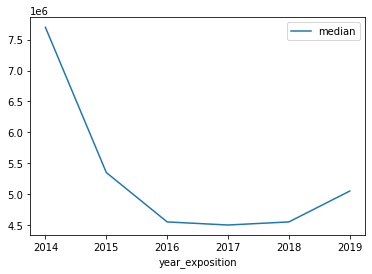

In [108]:
pivot_year_exposition.plot(y='median');

>Показано падение цены с 2014 года до 2016 года, минимальная цена недвижимости была в 2107 году 6.5 млн., дальше идет возрастание

In [109]:
pivot_year = good_data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'median', 'count'])
pivot_year.columns =  ['mean', 'median', 'count']
pivot_year

,mean,median,count
year_exposition,,,
2014,86.249854,76.26,137
2015,71.558371,60.00,1191
2016,62.156144,53.10,2783
2017,60.759249,52.00,8190
2018,57.677386,50.50,8519
2019,59.467864,52.00,2879


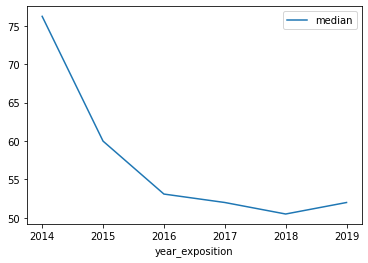

In [110]:
pivot_year.plot(y='median');

####  Расчет средней цены одного квадратного метра в 10 населенных пунктах с большим числом объявлений
>Рассмотрим распределение среднего значение цена за квадратный метр в 10 населенныхпунктак с большим коллчеством выложенных объявлений

In [111]:
pivot_type_local = ( 
    good_data
    .query('type_local_name != "другое"')
    .pivot_table(index = 'type_local_name', values = 'price_square_meter', aggfunc = ['mean', 'count'])
)
pivot_type_local.columns = ['mean', 'count']
pivot_type_local = pivot_type_local.sort_values(by='mean', ascending= False).reset_index()
pivot_type_local 

,type_local_name,mean,count
0,санкт-петербург,219494.347624,15721
1,парголово,198883.446483,327
2,кудрово,194577.864407,472
3,пушкин,192413.325203,369
4,мурино,175264.276271,590
5,шушары,155393.577273,440
6,всеволожск,133480.773869,398
7,колпино,132288.807692,338
8,гатчина,121807.749186,307
9,выборг,99563.510460,239


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

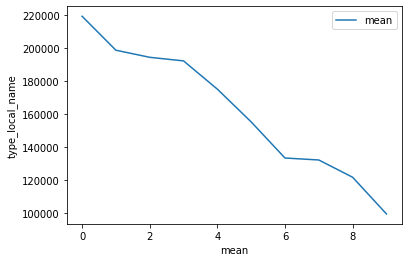

In [112]:
pivot_type_local.plot(y='mean');
plt.xlabel('mean');
plt.ylabel('type_local_name');

> Самая высокая средняя стоимость за квадратный метр городе *санкт-петербург* и составляет 219494, самое низкое значение в городе *выбор* 99563. 

#### Как стоимость объектов зависит от расстояния до центра города
>Для того что бы выяснить как расстояние до центра города влияет на стоимость квартиры выделим самый большой город Санкт-Петербург и вычислим средню средню цену в зависимости от килломентров

In [113]:
pivot_type_local_km = ( 
    good_data
    .query('type_local_name == "санкт-петербург"')
    .pivot_table(index = 'city_сenters_nearest_km', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
)
pivot_type_local_km.columns = ['mean', 'count', 'median']
pivot_type_local_km.sort_values(by='mean', ascending= False).reset_index()

,city_сenters_nearest_km,mean,count,median
0,0.0,2.344232e+07,86,11750000
1,1.0,1.885085e+07,240,10835000
2,2.0,1.616331e+07,307,9500000
3,77.0,1.569329e+07,61,8600000
4,5.0,1.530612e+07,769,8920262
5,6.0,1.438911e+07,470,8005000
6,4.0,1.363202e+07,907,9900000
7,3.0,1.343683e+07,526,8500000
8,7.0,1.279767e+07,407,7500000
9,8.0,8.445272e+06,670,6500000


In [114]:
pivot_type_local_km.describe()

,mean,count,median
count,3.100000e+01,31.000000,3.100000e+01
mean,8.524246e+06,507.129032,6.153379e+06
std,5.248214e+06,518.832712,2.320895e+06
min,3.575000e+06,2.000000,3.420000e+06
25%,5.046870e+06,78.500000,4.574750e+06
50%,5.977039e+06,307.000000,5.000000e+06
75%,1.311725e+07,838.000000,8.152500e+06
max,2.344232e+07,1515.000000,1.175000e+07


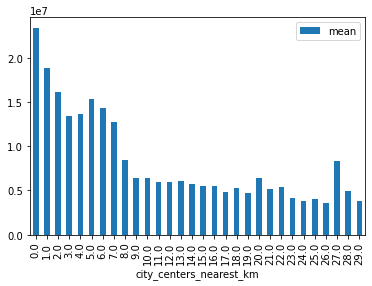

In [115]:
pivot_type_local_km.query('city_сenters_nearest_km <= 30').plot(y='mean', kind = 'bar');

> Средняя стоимость квартир в Питере зависит расстояния до центра города. Максимальная средняя цена 2.3 млн, а находяться такие квартиры в самом центре питера, более низкое значение цены имеют квартиры с удаленностью от центра больше 9 км. 

### Общий вывод

Было проведено исследование, для изучения влияния различных факторов на цену недвижимости. Входные данные - статистика  данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

До исследования была проведена предобработка данных:

* обнаружено большее колличество отсутсвующих данных нужных для исследования
  - ceiling_height - 39%
  - airports_nearest - 23%
  - city_сenters_nearest - 23%
  - parks_around3000 - 23%
  - parks_nearest - 66%
  - ponds_around3000 - 23%
  - ponds_nearest - 62%
* все данные по возможности были заменены на медианные значения или маркеры для сохранения другой важной информации для анализа в строках 
* в данных присуствуют аномально высокие значения
   * Общая площадь квартиры равная 900 м2;
   * Жилая площадь равная 409 м2;
   * Площадь кухни равная 112 м2;
   * Цена обекта 12 тыс;
   * Колличество комнат равное 0;
   * Высота потолков ниже 2 м и выше 5;
   * Общее колличество этажей в дома равное 60 (при этом дом находится в столбце 'type_local_name' *Другое*
   * Расстояние до аэропорта равное нулю
* были обработаны неявные дупликаты
* в некоторох столбцах был изменет тип данных, в основном для уменьшения знаков после запятой
* в столбце дато публикации был изменет формат и удалены часы, минуты и секунды так, как они имели нулевые значения
* были добавлены новые столбцы для проведения анализа 
   - расчет одного квадратного метра  price_square_meter, значение сразу преведенов целочисленное
   - день недели, месяц, год размещения объявления. Для каждого значения добавлен новый столбец weekday_exposition, month_exposition, year_exposition
   - добавлен столбец тип этажа type_floors 
   - добавлен столбец тип города type_local_name'
   - добавлен новый столбец с растрояним до центра города в километрах city_сenters_nearest_km


Перед проведением исследования было поставлено несколько гипотез:

* Гипотеза 1: Влияние времни размещения объявление на скорость продажи;
* Гипотеза 2: Влияние жилой площади квартиры на общую стоимость недвижимости;
* Гипотеза 3: Влияние площади кухни на общую стоимость недвижимости;
* Гипотеза 4: Влияние колличества комнат на общую стоимость недвижимости;
* Гипотеза 5: Влияние типа этажа на общую стоимость недвижимости;
* Гипотеза 6: Влияние даты размещений(день, месяц, год) на общую стоимость недвижимости;
* Гипотеза 7: Влияние даты населенного пункта  на среднюю стоимость квадратного метра;
* Гипотеза 8: Влияние расстояния до центра города на общую стоимость недвижимости (в Санкт-Петербурге);

В результате исследования удалось выявить зависимость.

**Гипотеза 1 частично подтверждена:** *из этой выборки не ясно квартиру продали или просто данное объявление снято

* По графику диаграммы размаха то видно что нижняя граница "уса" начинается на значение 1, верхняя граница заканчивается в районе 500 дней, следовательно нормальная скорость продаж распологается в пределах от 1 до 500 дней. Получается что аномально быстрых продаж квартиры нет и есть только аномально долгие (выше 500 дней).

**Гипотеза 2  частично подтверждена:** 

* Кэффициент Пирсона высоко положительный - 0.65, следовательно с увелчиением общей площажди сильно растет и цена.

**Гипотеза 3 не подтверждена:**

* Кэффициент Пирсона средне положительный  - 0.38, следовательно с увеличением площади кухни, общаястоимость не сильно возрастает

**Гипотеза 4 не подтверждена:**
* Кэффициент Пирсона средне положительный  - 0.36, следовательно с увелчиением общей стоимости не сильно растет колличество комнат в квартире

**Гипотеза 5 подтверждена:** 

* Квартиры расположенные на первом этаже стоят дешевле чем на последнем, но при этом медианные значения не сильно отличаются друг от друга

**Гипотеза 6 подтверждена:** 
* Помещения с самой высокой ценой выставляют по Вторникам, после вторника цена резко начинает падать и приходик к минимальному значению в восресенье. Хоть разница между максимальной и минимальной ценой не такая и большая, но кому-то эти 200 тыс. очень сильно помогут) Как мы уже видили раньше, больше всего объявлений выкладывают в будни, но почему цена во вторник самая высока? Люди во время рабочей недели понимают что можно и продать подороже.

* Зависимости цены от месяца размещения чем то напоминает график распределения времени публикаций по месяцам, одни из высоких цен все так жеможно наблюдать в зимний и осенний периодыБ правда есть резкий скачок на 4 месяце весной, но потом все так же снижается весенне летний период. Скорее всего это связано и с тем что в этом месяце выкладывают меньше объявлений, значит и меньше просматривают, и чем привлекательней будет цена,тем больше вероятность того что помещение можно будет продать. Цена растет со спросом! (хотя тут конечно не уверена)

* Показано падение цены с 2014 года до 2016 года, минимальная цена недвижимости была в 2107 году 6.5 млн., дальше идет возрастание

**Гипотеза 7 подтверждена:** 
* Самая высокая средняя стоимость за квадратный метр городе *санкт-петербург* и составляет 219494, самое низкое значение в городе *выбор* 99563.

**Гипотеза 8:**
* Средняя стоимость квартир в Питере зависит расстояния до центра города. Максимальная средняя цена 2.3 млн, а находяться такие квартиры в самом центре питера, более низкое значение цены имеют квартиры с удаленностью от центра больше 9 км. 